In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
[feature for feature in df.columns if df[feature].isnull().sum()]

[]

<b> so we have no null data!

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df["Ram"]=df["Ram"].str.strip("GB").astype(int)


In [9]:
df["Ram"].dtypes

dtype('int64')

In [10]:
df["Weight"]=df["Weight"].str.replace("kg","").astype(float)
df["Weight"].dtypes

dtype('float64')

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Price', ylabel='Count'>

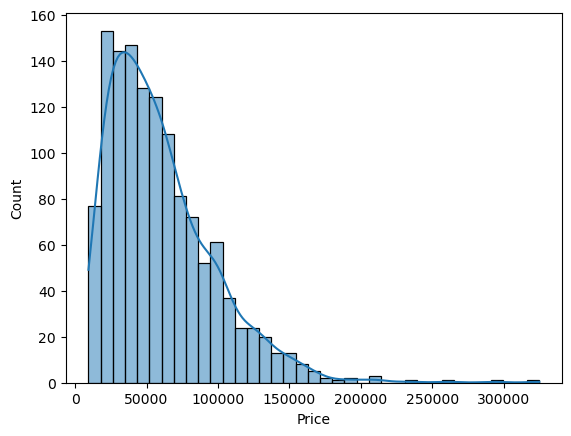

In [12]:
sns.histplot(df["Price"],kde=True)

<AxesSubplot:>

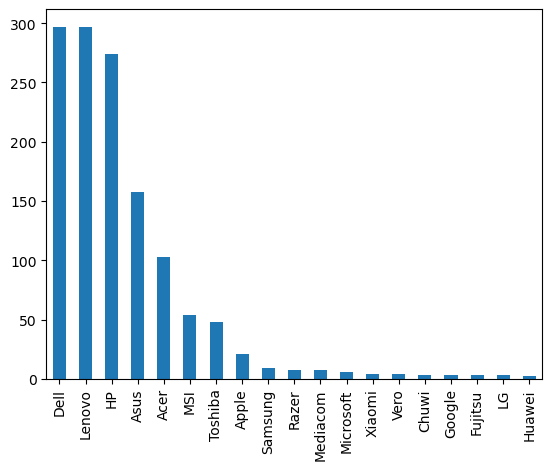

In [13]:
df["Company"].value_counts().plot(kind="bar")

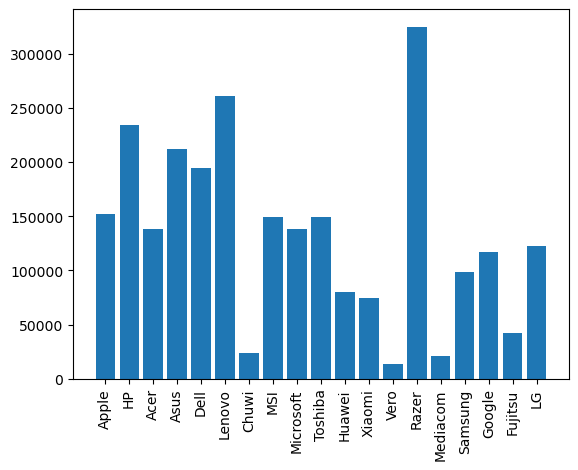

In [14]:
plt.bar(df["Company"],df["Price"])
plt.xticks(rotation='vertical')
plt.show()

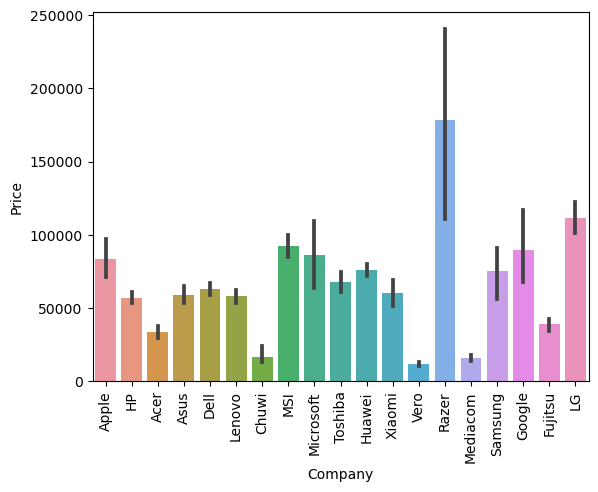

In [15]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [16]:
pd.crosstab(df["Company"],df["TypeName"],values=df.Price,aggfunc=np.sum)


TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,2.978357e+05,6.257736e+05,81518.400,2.244734e+06,1.897834e+05,NaN
Apple,NaN,NaN,NaN,NaN,1.750150e+06,NaN
Asus,6.762836e+05,4.948662e+06,56732.544,2.238605e+06,1.374880e+06,NaN
Chuwi,NaN,NaN,NaN,5.023718e+04,NaN,NaN
Dell,1.808862e+06,4.088479e+06,55357.920,7.656812e+06,3.858424e+06,1.300611e+06
Fujitsu,NaN,NaN,NaN,1.165234e+05,NaN,NaN
Google,NaN,NaN,NaN,NaN,2.681582e+05,NaN
HP,1.525374e+06,9.105019e+05,482716.800,8.005816e+06,2.948359e+06,1.715379e+06
Huawei,NaN,NaN,NaN,NaN,1.517414e+05,NaN


In [17]:
df_new=df.groupby(["Company"])["Price"].sum().reset_index().sort_values("Price",ascending=False)
df_new.head()

,Company,Price
4,Dell,1.876855e+07
10,Lenovo,1.719112e+07
7,HP,1.558815e+07
2,Asus,9.295163e+06
11,MSI,4.974276e+06


[]

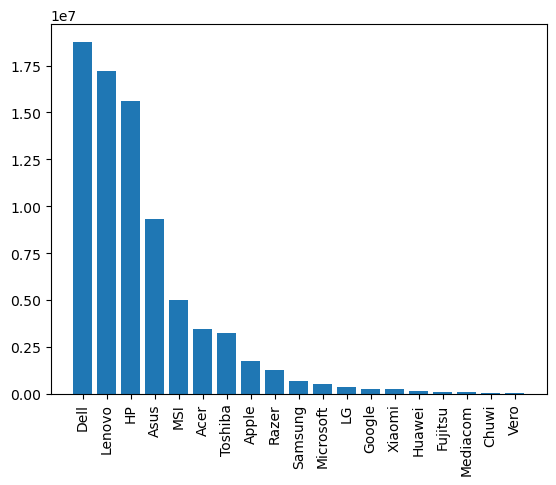

In [18]:
plt.bar(df_new["Company"],df_new["Price"])
plt.xticks(rotation="vertical")
plt.plot()

In [19]:
df[df["Company"]=="Apple"]["Price"].mean()

83340.49988571428

In [20]:
df[df["Company"]=="Razer"]["Price"].mean()

178282.49142857143

In [21]:
df_2=df.groupby(["Company"])["Price"].sum().reset_index()
df_2

,Company,Price
0,Acer,3.439645e+06
1,Apple,1.750150e+06
2,Asus,9.295163e+06
3,Chuwi,5.023718e+04
4,Dell,1.876855e+07
5,Fujitsu,1.165234e+05
6,Google,2.681582e+05
7,HP,1.558815e+07
8,Huawei,1.517414e+05
9,LG,3.355042e+05


[]

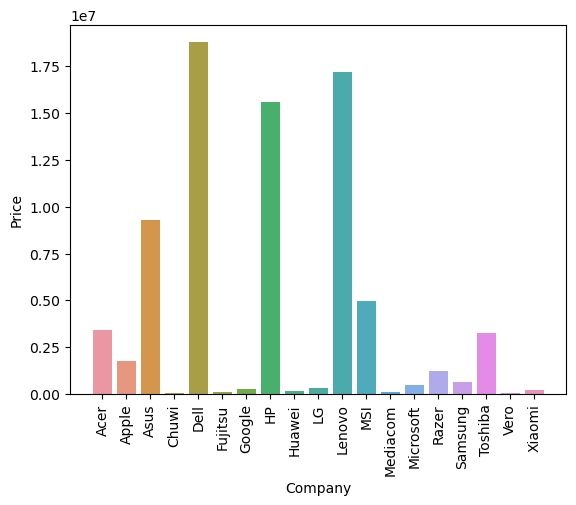

In [22]:
sns.barplot(x=df_2["Company"],y=df_2["Price"])
plt.xticks(rotation="vertical")
plt.plot()

#### in plt.bar==> max
#### in sns.barplot ==> mean
A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars


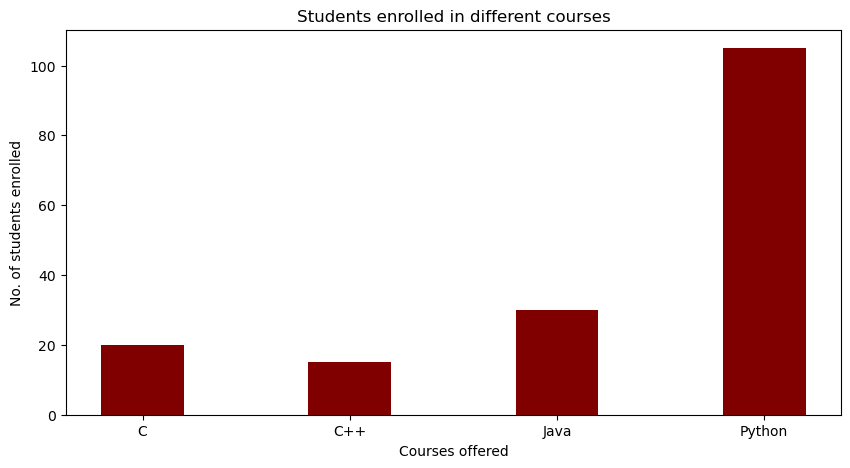

In [23]:
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,'Python':45,"Python":105}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()


<AxesSubplot:xlabel='TypeName'>

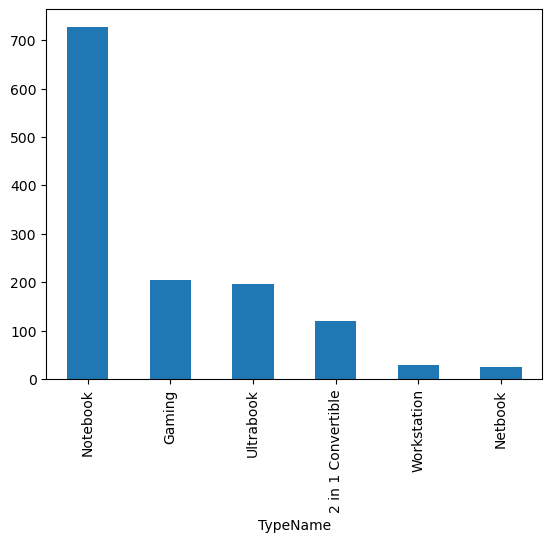

In [24]:
df.groupby(["TypeName"]).size().sort_values(ascending=False).plot(kind="bar")

[]

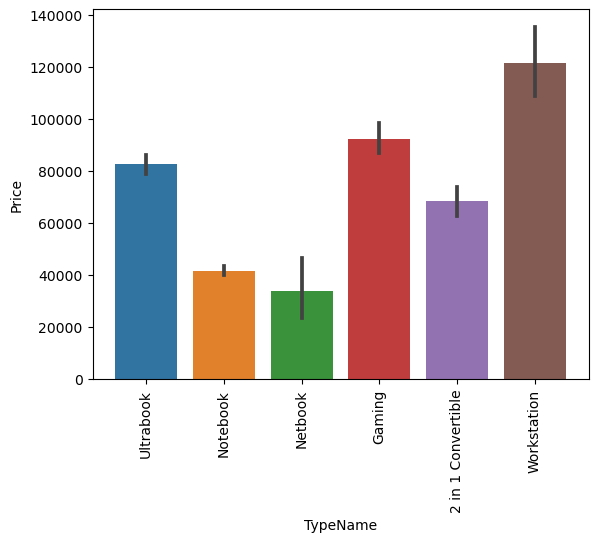

In [25]:
sns.barplot(data=df,x="TypeName",y="Price")
plt.xticks(rotation="vertical")
plt.plot()

[]

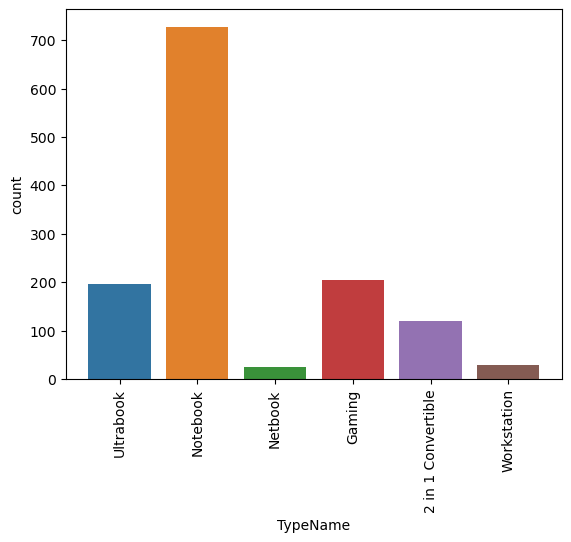

In [26]:
sns.countplot(x=df["TypeName"])
plt.xticks(rotation="vertical")
plt.plot()

<AxesSubplot:xlabel='Inches', ylabel='Count'>

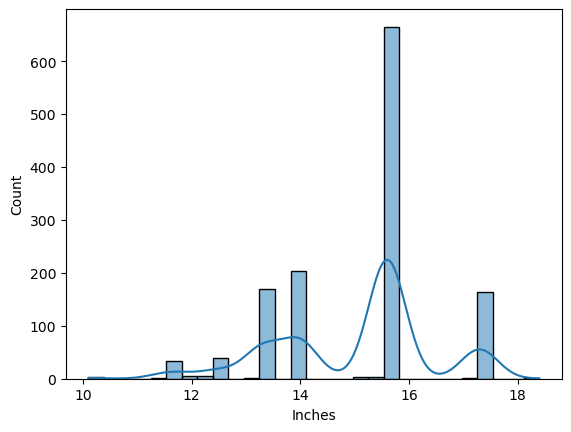

In [27]:
sns.histplot(df['Inches'],kde=True)

<AxesSubplot:xlabel='Inches', ylabel='Price'>

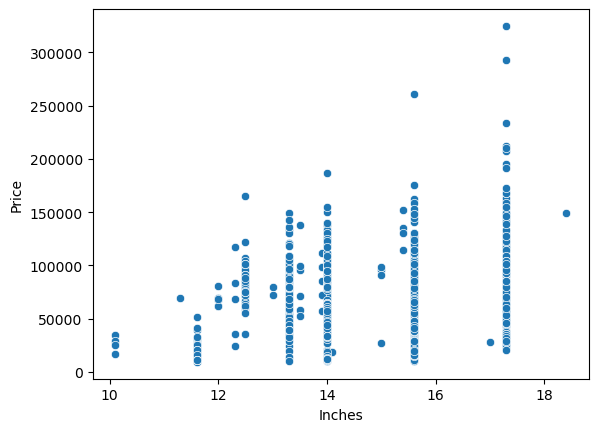

In [28]:
sns.scatterplot(x=df["Inches"],y=df["Price"])

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

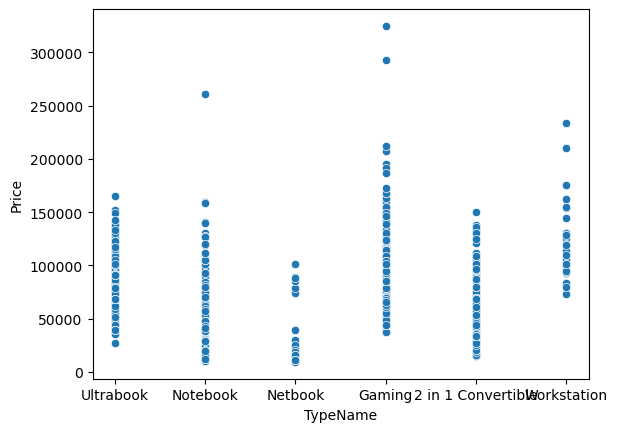

In [29]:
sns.scatterplot(x=df["TypeName"],y=df["Price"])

In [30]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [31]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0 )
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

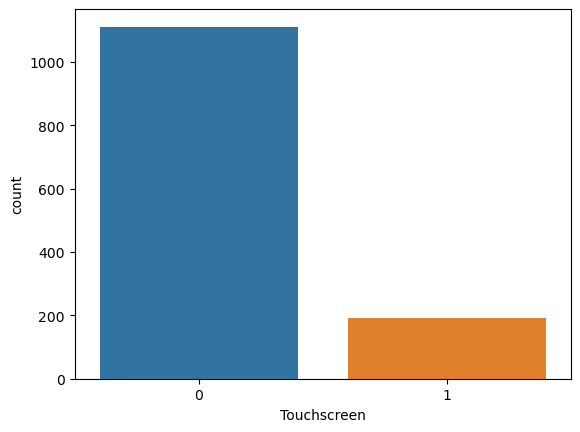

In [32]:
sns.countplot(x=df["Touchscreen"])

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

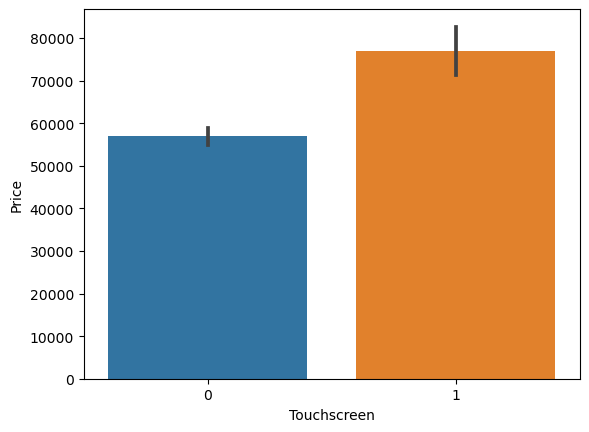

In [33]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [34]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df["Ips"].head()

0    1
1    0
2    0
3    1
4    1
Name: Ips, dtype: int64

<AxesSubplot:xlabel='Ips', ylabel='Price'>

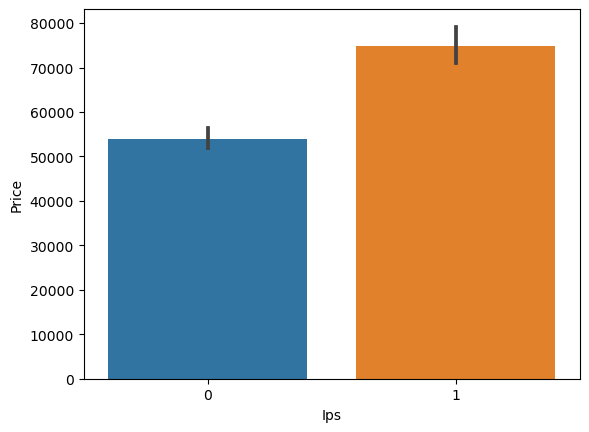

In [35]:
sns.barplot(x=df["Ips"],y=df["Price"])

<AxesSubplot:xlabel='Ips', ylabel='count'>

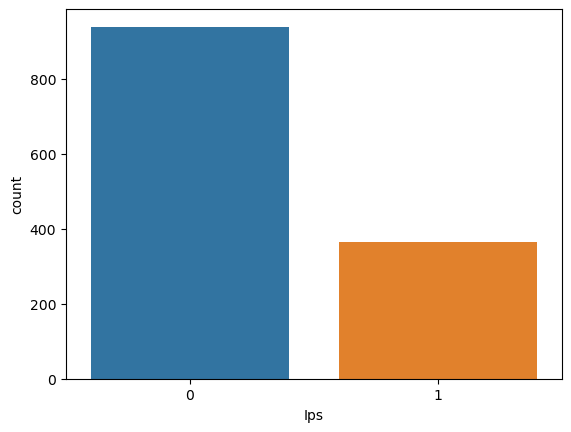

In [36]:
sns.countplot(x=df["Ips"])

In [37]:
df["X_res"]=df["ScreenResolution"].apply(lambda x: x.split("x")[0])
df["Y_res"]=df["ScreenResolution"].apply(lambda x: x.split("x")[1])


In [38]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
168,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,45501.120,0,1,IPS Panel Full HD 1920,1080
1029,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,57542.400,0,0,Full HD 1920,1080
260,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,60845.760,0,0,Full HD 1920,1080
882,Asus,Notebook,14.1,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.65,18541.440,0,0,1366,768
703,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.10,33110.856,0,0,Full HD 1920,1080


In [39]:
df["Y_res"]=df["Y_res"].astype(int)

In [40]:
df["X_res"].unique()

array(['IPS Panel Retina Display 2560', '1440', 'Full HD 1920',
       'IPS Panel Retina Display 2880', '1366', 'IPS Panel Full HD 1920',
       'IPS Panel Retina Display 2304',
       'IPS Panel Full HD / Touchscreen 1920',
       'Full HD / Touchscreen 1920', 'Touchscreen / Quad HD+ 3200',
       'IPS Panel Touchscreen 1920', 'Touchscreen 2256',
       'Quad HD+ / Touchscreen 3200', 'IPS Panel 1366',
       'IPS Panel 4K Ultra HD / Touchscreen 3840',
       'IPS Panel Full HD 2160', '4K Ultra HD / Touchscreen 3840',
       'Touchscreen 2560', '1600', 'IPS Panel 4K Ultra HD 3840',
       '4K Ultra HD 3840', 'Touchscreen 1366', 'IPS Panel Full HD 1366',
       'IPS Panel 2560', 'IPS Panel Full HD 2560',
       'IPS Panel Retina Display 2736', 'Touchscreen 2400', '2560',
       'IPS Panel Quad HD+ 2560', 'IPS Panel Quad HD+ 3200',
       'IPS Panel Quad HD+ / Touchscreen 3200',
       'IPS Panel Touchscreen 1366', '1920',
       'IPS Panel Touchscreen / 4K Ultra HD 3840',
       'IPS Pa

In [41]:
import re
x_res=[]
for i in df["X_res"]:
       x_res.append(int(re.findall('[0-9]+', i)[0]))

In [42]:
df["X_res"]=x_res
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242.7200,0,1,1920,1080
832,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920,Linux,2.10,27652.3200,0,0,1920,1080
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,146519.4672,0,1,1920,1080
1113,HP,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.16,104908.3200,0,0,1920,1080
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0,1920,1080
774,HP,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,66280.3200,0,0,1366,768
690,Acer,Notebook,14.0,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,19980.0000,0,0,1366,768
1094,HP,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,85194.7200,0,0,1366,768
369,HP,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,93240.0000,0,1,1920,1080
531,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,45820.8000,0,1,1920,1080


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [44]:
df.corr()['Price']

/tmp/ipykernel_119976/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.083832
Y_res          0.552809
Name: Price, dtype: float64

In [45]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [46]:
df.corr()['Price']

/tmp/ipykernel_119976/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.083832
Y_res          0.552809
ppi            0.348331
Name: Price, dtype: float64

In [47]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [48]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [49]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [50]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [51]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.sample(8)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
156,Lenovo,2 in 1 Convertible,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.74,33513.12,1,1,157.350512,Intel Core i3,Intel Core i3
345,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,60153.12,0,1,141.211998,Intel Core i7,Intel Core i7
625,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,47898.72,0,0,141.211998,Intel Core i7,Intel Core i7
283,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,30849.12,0,0,141.211998,Intel Core i5,Intel Core i5
602,Acer,Notebook,Intel Celeron Quad Core N3450 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.60,17529.12,0,0,157.350512,Intel Celeron Quad,Other Intel Processor
19,Dell,Ultrabook,Intel Core i5 8250U 1.6GHz,8,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.12,1,1,165.632118,Intel Core i5,Intel Core i5
632,Lenovo,Notebook,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,1.80,44169.12,0,0,141.211998,Intel Core i5,Intel Core i5
439,Asus,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Linux,2.00,29783.52,0,0,141.211998,Intel Core i5,Intel Core i5


[]

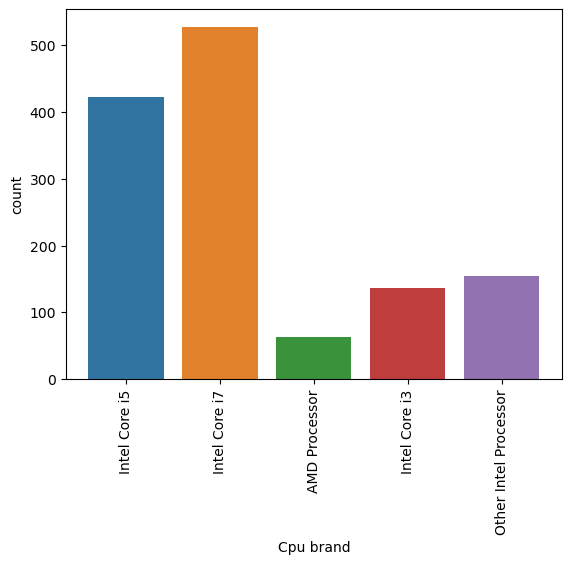

In [52]:
sns.countplot(x=df["Cpu brand"])
plt.xticks(rotation="vertical")
plt.plot()

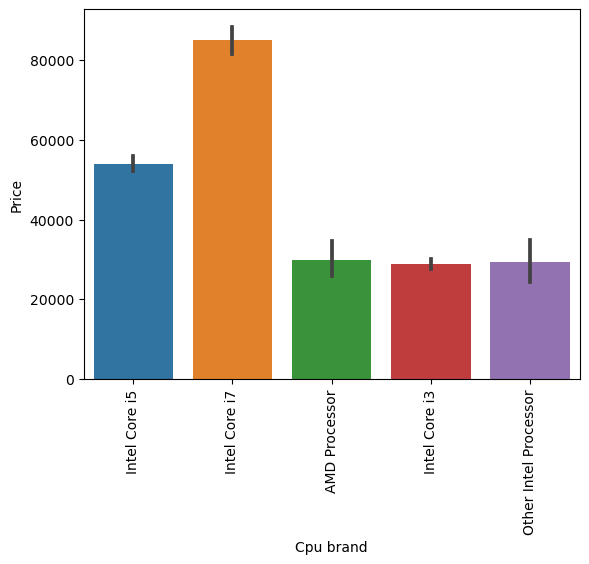

In [53]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

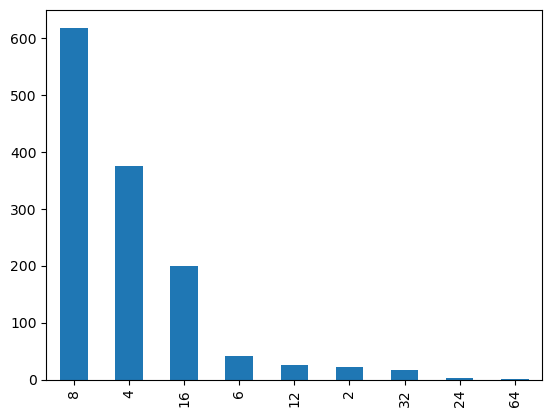

In [55]:
df['Ram'].value_counts().plot(kind='bar')

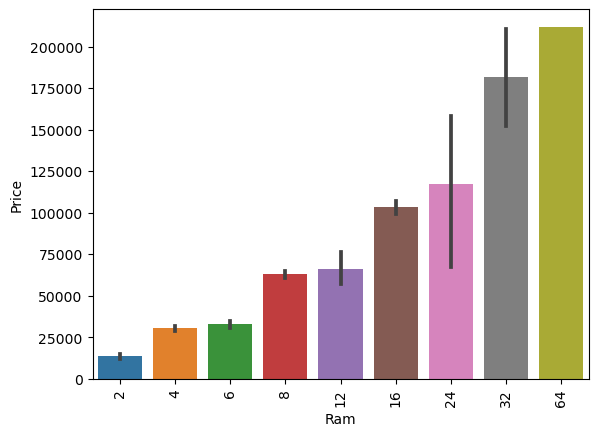

In [56]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [58]:
df['Memory_temp'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory_temp"] = df["Memory_temp"].str.replace('GB', '')
df["Memory_temp"] = df["Memory_temp"].str.replace('TB', '000')
df["Memory_temp"].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [59]:
disk=df["Memory_temp"].str.split("+",expand=True)
disk

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [60]:
df["first"]=disk[0]
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Memory_temp,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
1178,MSI,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.91,114731.5536,0,0,141.211998,Intel Core i7,128 SSD + 1000 HDD,128 SSD,0,1,0,0
217,HP,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.6800,0,0,157.350512,Intel Core i7,256 SSD,256 SSD,0,1,0,0
55,Dell,Notebook,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,40908.3840,0,0,141.211998,Intel Core i7,256 SSD,256 SSD,0,1,0,0
778,Razer,Gaming,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.7200,0,0,157.350512,Intel Core i7,512 SSD,512 SSD,0,1,0,0
524,Dell,Notebook,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,47365.9200,0,1,127.335675,Intel Core i5,128 SSD + 1000 HDD,128 SSD,0,1,0,0


In [61]:
df["first"]=df["first"].str.findall('[0-9]+')
df["first"]

0        [128]
1        [128]
2        [256]
3        [512]
4        [256]
         ...  
1298     [128]
1299     [512]
1300      [64]
1301    [1000]
1302     [500]
Name: first, Length: 1303, dtype: object

In [62]:
df["first"]=df["first"].apply(lambda x:int( x[0]))

In [63]:
df["second"]=disk[1]
df.isna().sum()

Company                   0
TypeName                  0
Ram                       0
Memory                    0
Gpu                       0
OpSys                     0
Weight                    0
Price                     0
Touchscreen               0
Ips                       0
ppi                       0
Cpu brand                 0
Memory_temp               0
first                     0
Layer1HDD                 0
Layer1SSD                 0
Layer1Hybrid              0
Layer1Flash_Storage       0
second                 1095
dtype: int64

In [64]:
df["second"].fillna("0",inplace=True)
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Memory_temp,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,second
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,128,0,1,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,128,0,0,0,1,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,256,0,1,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,512,0,1,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,256,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD,128,0,1,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD,512,0,1,0,0,0
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage,64,0,0,0,1,0
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD,1000,1,0,0,0,0


In [65]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [66]:
df["second"]=df["second"].str.findall('[0-9]+')
df["second"]=df["second"].apply(lambda x:float( x[0]))
df["second"].value_counts()

0.0       1095
1000.0     187
2000.0      15
256.0        3
500.0        2
512.0        1
Name: second, dtype: int64

In [67]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [68]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Memory_temp,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0.0,0.0,0.0,128.0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0.0,256.0,0.0,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int64  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float64
 7   Price          1303 non-null   float64
 8   Touchscreen    1303 non-null   int64  
 9   Ips            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  Cpu brand      1303 non-null   object 
 12  Memory_temp    1303 non-null   object 
 13  HDD            1303 non-null   float64
 14  SSD            1303 non-null   float64
 15  Hybrid         1303 non-null   float64
 16  Flash_Storage  1303 non-null   float64
dtypes: float64(7), int64(3), object(7)
memory usage: 173

In [70]:
df.drop(columns=['Memory',"Memory_temp"],inplace=True)

In [71]:
df.corr()['Price']

/tmp/ipykernel_119976/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.348331
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [72]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0


In [73]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [74]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [75]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [76]:
df=df[df["Gpu brand"]!="ARM"]
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel


<AxesSubplot:>

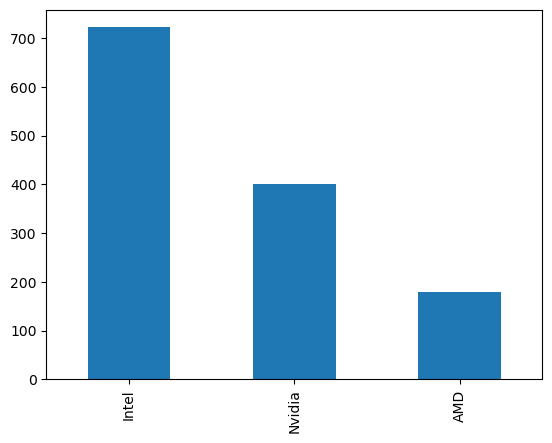

In [77]:
df['Gpu brand'].value_counts().plot(kind="bar")

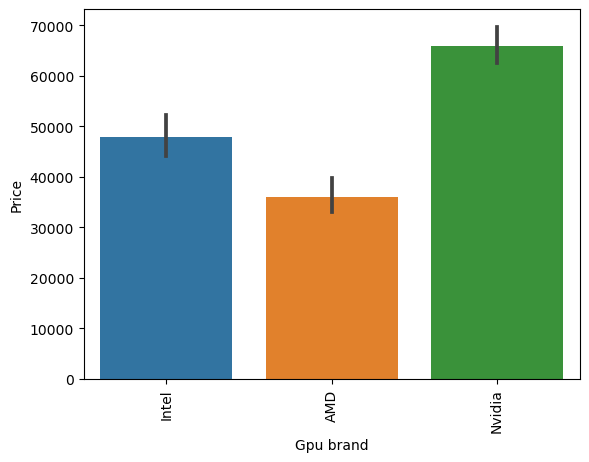

In [78]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
df.drop(["Gpu"],axis=1,inplace=True)

/tmp/ipykernel_119976/414033518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Gpu"],axis=1,inplace=True)


In [80]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel


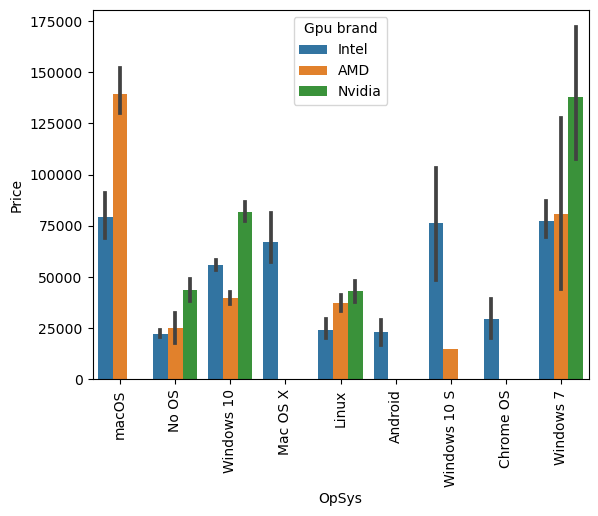

In [81]:
sns.barplot(x=df['OpSys'],y=df['Price'],hue=df["Gpu brand"])
plt.xticks(rotation='vertical')
plt.show()

In [82]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [83]:
def op_sys(x):
    if "Windows" in x:
        return "Windows"
    elif "mac" in x.lower():
        return "MacOs"
    else:
        return "Others/No OS/Linux"
df["os"]=df["OpSys"].apply(op_sys)

/tmp/ipykernel_119976/2042349375.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["os"]=df["OpSys"].apply(op_sys)


In [84]:
df["os"]

0                    MacOs
1                    MacOs
2       Others/No OS/Linux
3                    MacOs
4                    MacOs
               ...        
1298               Windows
1299               Windows
1300               Windows
1301               Windows
1302               Windows
Name: os, Length: 1302, dtype: object

In [85]:
df["OpSys"]

0            macOS
1            macOS
2            No OS
3            macOS
4            macOS
           ...    
1298    Windows 10
1299    Windows 10
1300    Windows 10
1301    Windows 10
1302    Windows 10
Name: OpSys, Length: 1302, dtype: object

In [86]:
df.drop(['OpSys'],axis=1,inplace=True)
df.head()

/tmp/ipykernel_119976/3653413056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['OpSys'],axis=1,inplace=True)


,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,MacOs
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,MacOs
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,MacOs


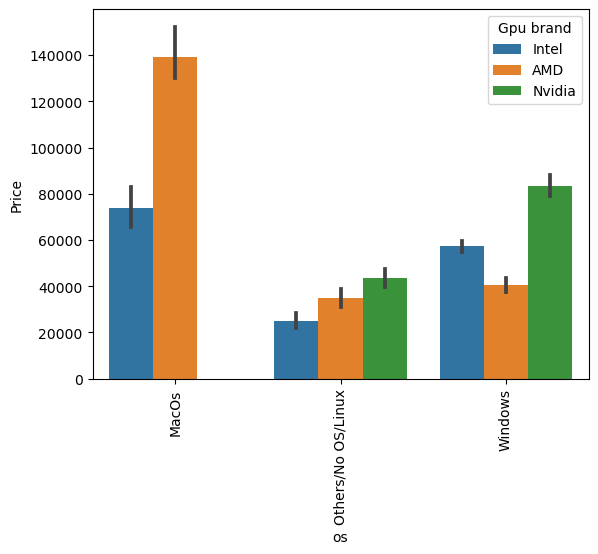

In [87]:
sns.barplot(x=df['os'],y=df['Price'],hue=df["Gpu brand"])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_119976/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

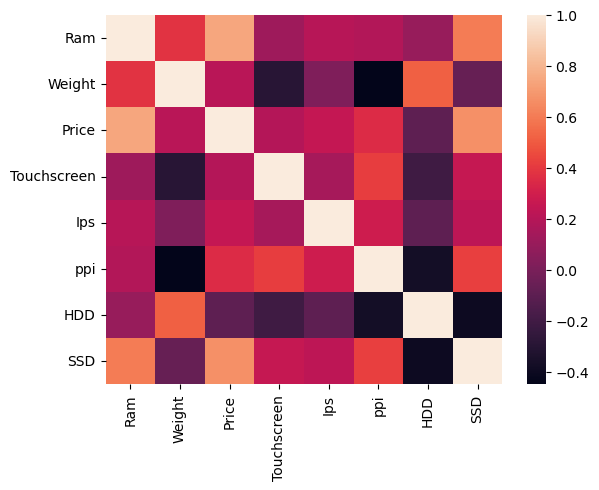

In [88]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Count'>

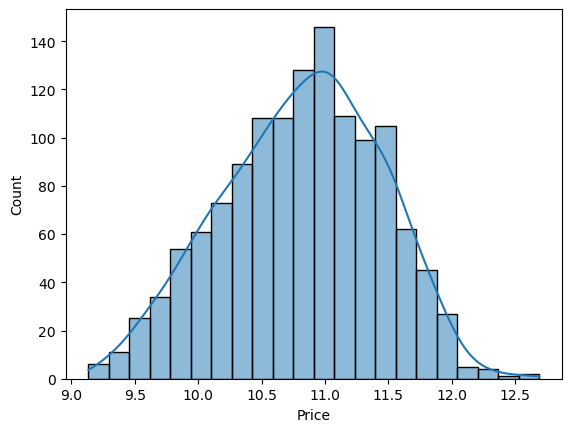

In [89]:
sns.histplot(np.log(df["Price"]),kde=True)

without log:  NormaltestResult(statistic=414.485410944645, pvalue=9.900032006703257e-91)
with log:  NormaltestResult(statistic=26.725930699796244, pvalue=1.572308950456524e-06)


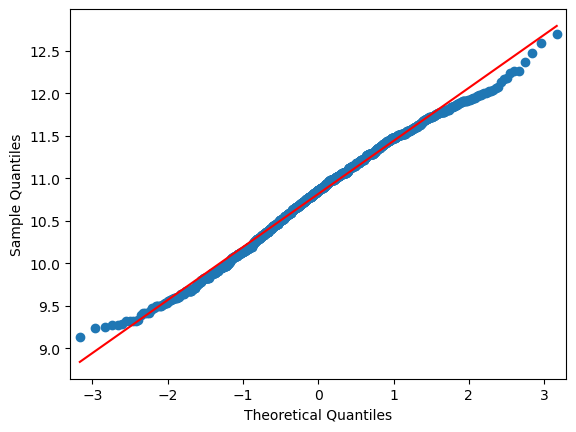

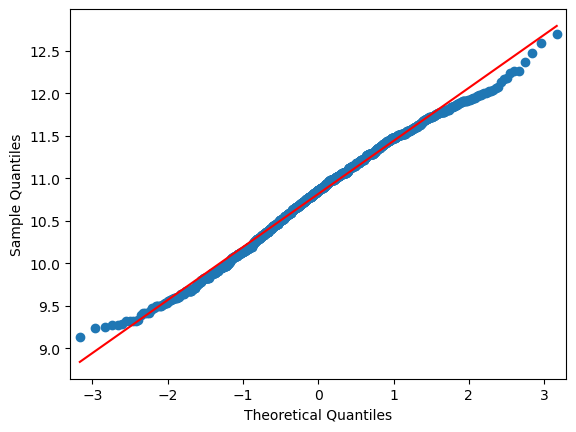

In [90]:
import scipy.stats as st
import statsmodels.api as sm
print("without log: ",st.normaltest(df["Price"]))
print("with log: ",st.normaltest(np.log(df["Price"])))
sm.qqplot(np.log(df["Price"]),line="s")

/tmp/ipykernel_119976/1766390825.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_transformed)


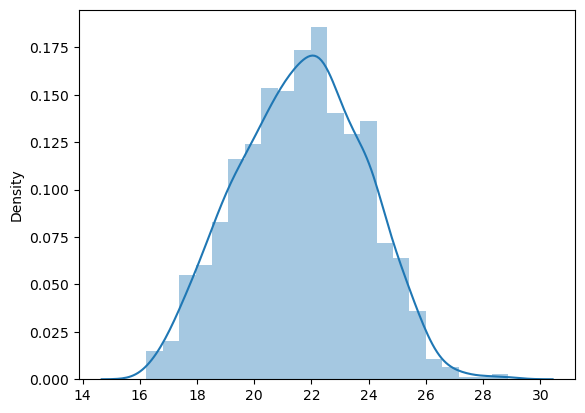

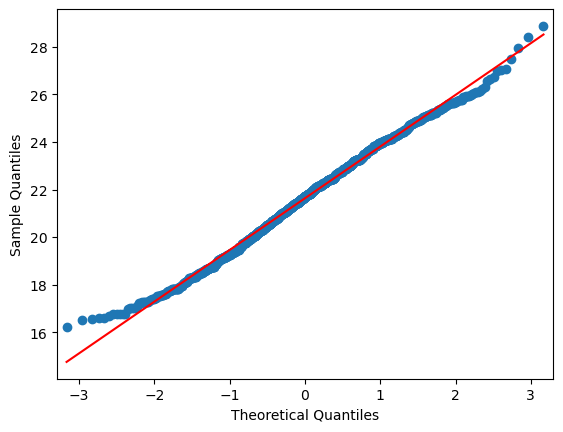

NormaltestResult(statistic=19.425740312284745, pvalue=6.049982072576451e-05)


In [91]:
sample_transformed, lambd = st.boxcox(df["Price"])#plot the distribution curve and QQ-plot for transformed data
sns.distplot(sample_transformed)
plt.show()
fig = sm.qqplot(sample_transformed,line='s')
plt.show()
print(st.normaltest(sample_transformed))

In [92]:
c=2**lambd
c**(1/lambd)

1.9999999999999991

In [93]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])
y1=df["Price"]
y2=df["Price"]**(lambd)

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)
(X_train.shape,X_test.shape)

((1106, 12), (196, 12))

## categorical data ti numerical data
In most scenarios, one hot **encoding**is the preferred way to convert a categorical variable into a numeric variable because **label encoding** makes it seem that there is a ranking between values.

This means that if your categorical variable has 100 unique values, you’ll have to create 100 new variables when using one hot encoding.

Depending on the size of your dataset and the type of variables you’re working with, you may prefer one hot encoding or label encoding.

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [96]:
df.select_dtypes(exclude=["number","bool_"]).columns


Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')

In [97]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [98]:
def modeling(X_test,y_test,y_train,X_train,model):
    step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
    step2=model
    pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    R2_score=r2_score(y_test,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    X_train=step1.fit_transform(X_train)
    cv_score=np.mean(cross_val_score(model,X_train,y_train,cv=5))
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-R2_score)*(n-1)/(n-p-1)
    ### check linear regresstion assumptions
    y_residual=(y_test-y_pred)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"Residual":y_residual})
    plt.figure(figsize=(5,5))
    sns.regplot(data=df_results,x="Actual",y='Predicted')
    plt.title("check linearity between y true and y predicted")
    ####### check residual
    mean_residual=df_results["Residual"].mean()
    plt.figure(figsize=(5,5))
    sm.qqplot(df_results["Residual"],line='s')
    plt.title("check normality of Residual")
    stat, p = st.normaltest(df_results["Residual"])
    alpha = 0.05
    if p > alpha:
        normality_error="Yes"
    else:
        normality_error="No"
        
    ### hemoscedasticity
    plt.figure(figsize=(5,5))
    plt.scatter(x=df_results.index, y=df_results.Residual, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    plt.title("check hemoscedasticity")
    return R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p

/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


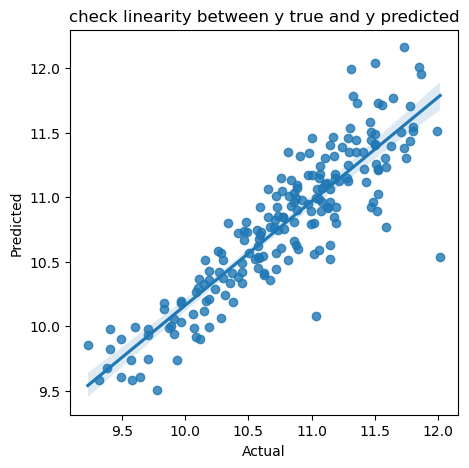

<Figure size 500x500 with 0 Axes>

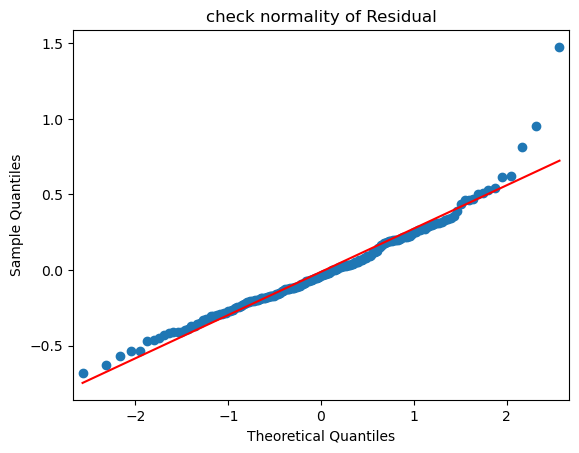

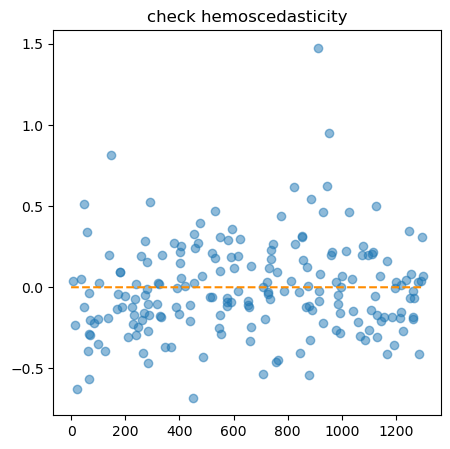

In [99]:
Y=modeling(X_test,y_test,y_train,X_train,LinearRegression())

In [100]:
result1=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"Linear regression"}).T
result=result1

/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0


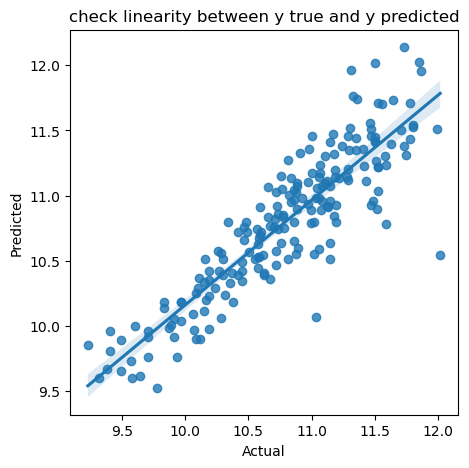

<Figure size 500x500 with 0 Axes>

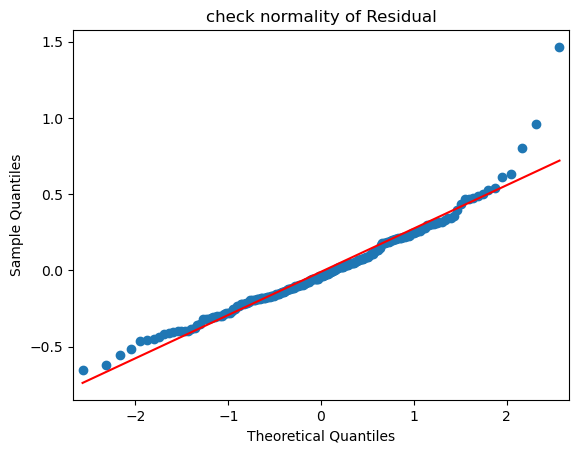

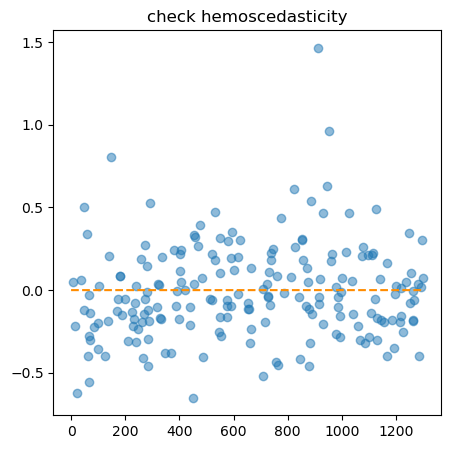

In [101]:
Y=modeling(X_test,y_test,y_train,X_train,Ridge())
result2=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"Ridge"}).T
result2

In [102]:
result=result.append(result2)
result

/tmp/ipykernel_119976/3865639581.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result2)


,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Linear regression,0.786207,0.285984,0.818335,0.772188,-0.01097,No,0.0
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0


/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_119976/2866286830.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result3)


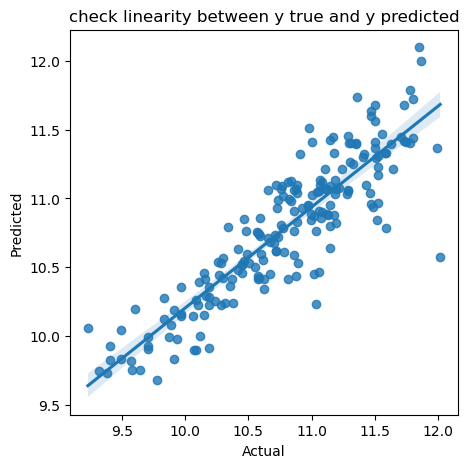

<Figure size 500x500 with 0 Axes>

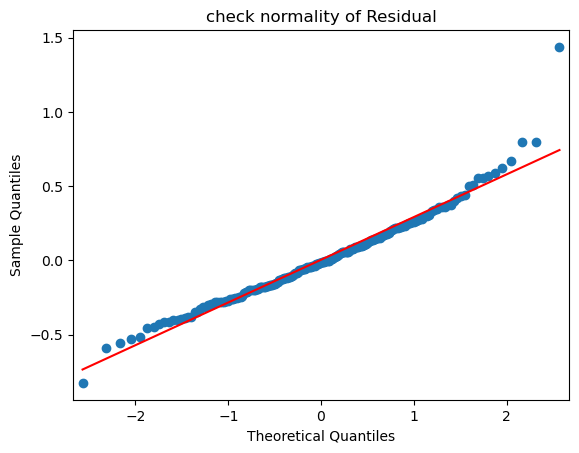

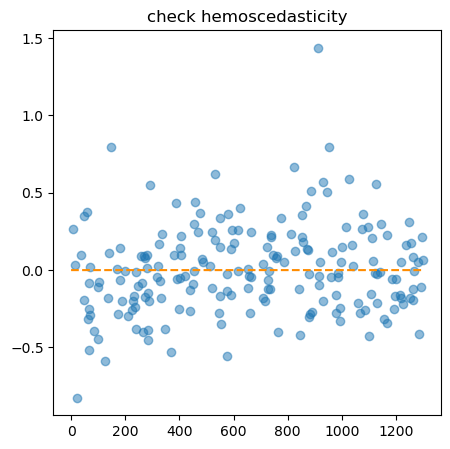

In [103]:
Y=modeling(X_test,y_test,y_train,X_train,Lasso(alpha=0.01))
result3=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"Lasso"}).T
result=result.append(result3)

In [104]:
result

,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Linear regression,0.786207,0.285984,0.818335,0.772188,-0.01097,No,0.0
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0
Lasso,0.783808,0.287584,0.767528,0.769631,0.003922,No,0.0


/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_119976/1555303442.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result4)


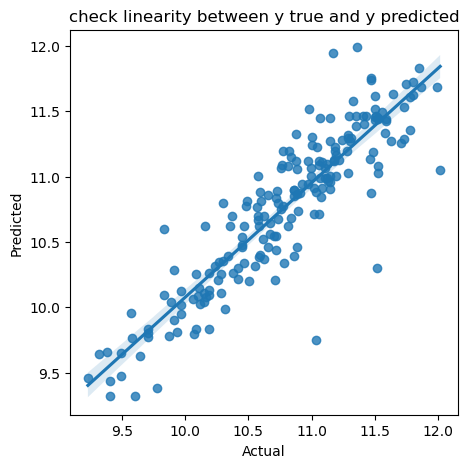

<Figure size 500x500 with 0 Axes>

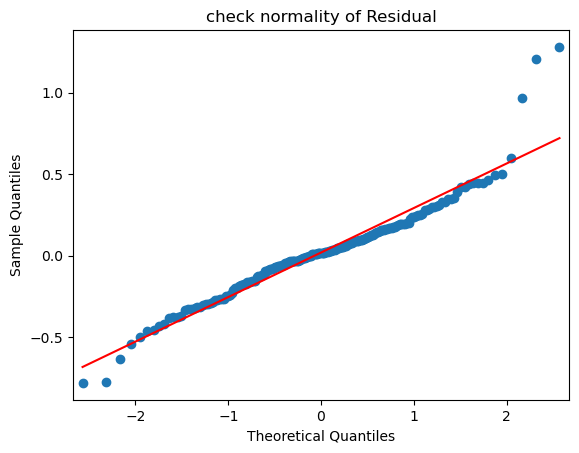

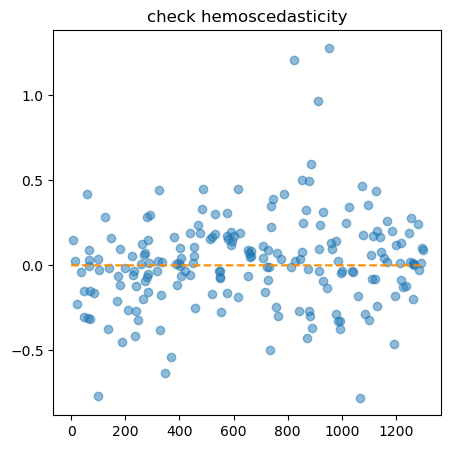

In [105]:
Y=modeling(X_test,y_test,y_train,X_train,KNeighborsRegressor(n_neighbors=3))
result4=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"KNN"}).T
result=result.append(result4)

/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_119976/2133324959.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result5)


,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Linear regression,0.786207,0.285984,0.818335,0.772188,-0.01097,No,0.0
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0
Lasso,0.783808,0.287584,0.767528,0.769631,0.003922,No,0.0
KNN,0.804376,0.273562,0.765425,0.791548,0.019783,No,0.0
Decision tree,0.852871,0.237243,0.799421,0.843223,0.004143,No,0.014636


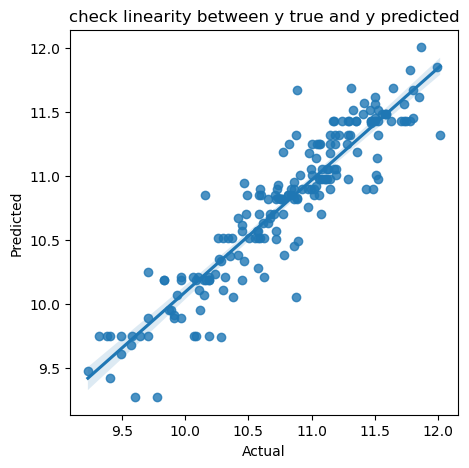

<Figure size 500x500 with 0 Axes>

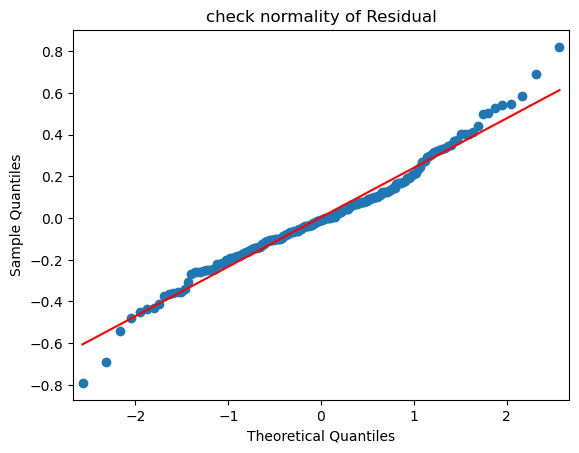

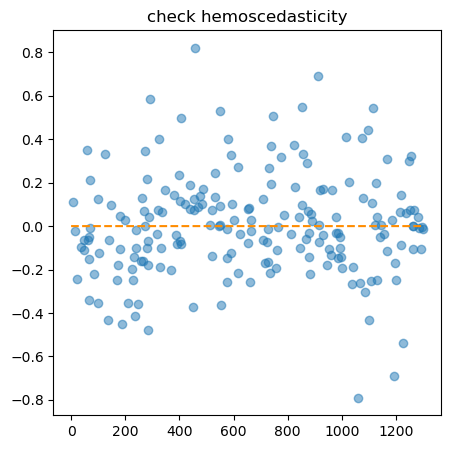

In [106]:
Y=modeling(X_test,y_test,y_train,X_train,DecisionTreeRegressor(max_depth=8))
result5=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"Decision tree"}).T
result=result.append(result5)
result

/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_119976/4228960525.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result6)


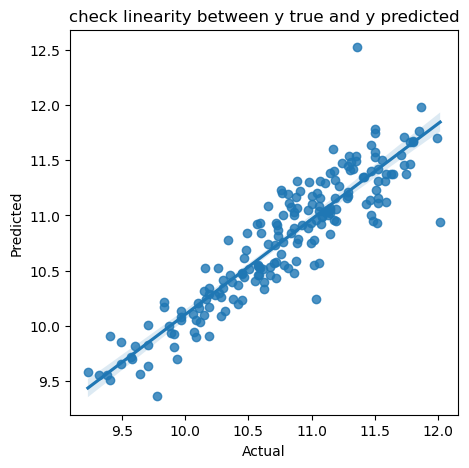

<Figure size 500x500 with 0 Axes>

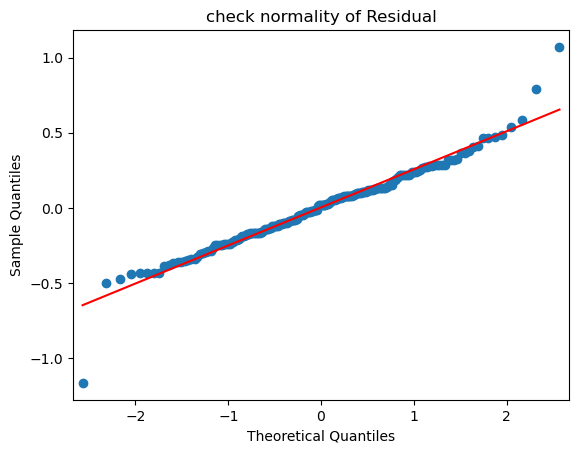

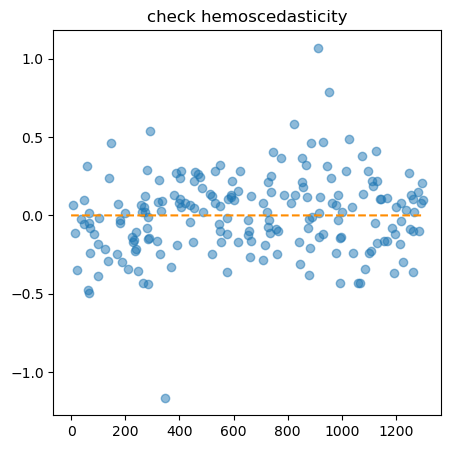

In [107]:
Y=modeling(X_test,y_test,y_train,X_train,SVR(kernel='rbf',C=10000,epsilon=0.1))
result6=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"SVR"}).T
result=result.append(result6)

In [108]:
result

,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Linear regression,0.786207,0.285984,0.818335,0.772188,-0.01097,No,0.0
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0
Lasso,0.783808,0.287584,0.767528,0.769631,0.003922,No,0.0
KNN,0.804376,0.273562,0.765425,0.791548,0.019783,No,0.0
Decision tree,0.852871,0.237243,0.799421,0.843223,0.004143,No,0.014636
SVR,0.832373,0.253231,0.822701,0.821381,0.002981,No,0.000099


/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_119976/4152637925.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result7)


,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Linear regression,0.786207,0.285984,0.818335,0.772188,-0.01097,No,0.0
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0
Lasso,0.783808,0.287584,0.767528,0.769631,0.003922,No,0.0
KNN,0.804376,0.273562,0.765425,0.791548,0.019783,No,0.0
Decision tree,0.852871,0.237243,0.799421,0.843223,0.004143,No,0.014636
SVR,0.832373,0.253231,0.822701,0.821381,0.002981,No,0.000099
random forest,0.887096,0.207826,0.869102,0.879692,-0.004462,No,0.037936


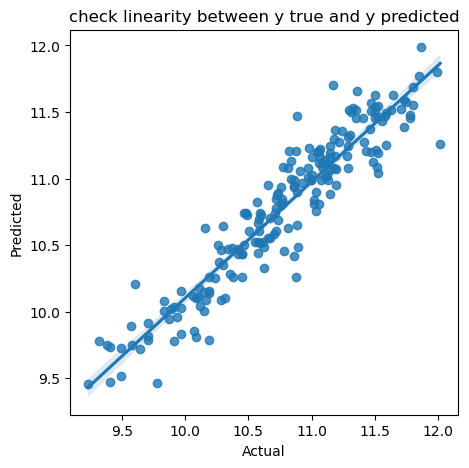

<Figure size 500x500 with 0 Axes>

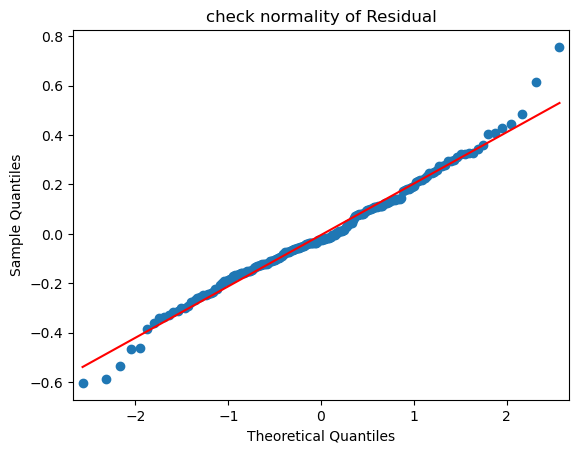

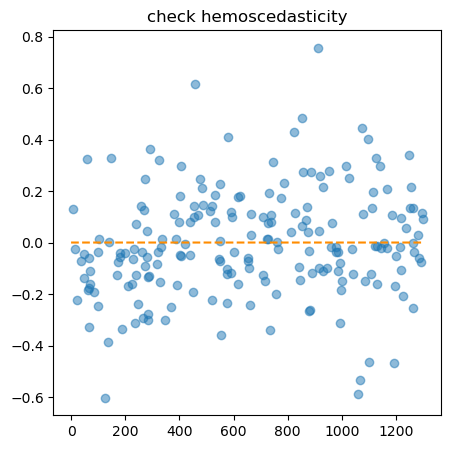

In [109]:
forest_model=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
Y=modeling(X_test,y_test,y_train,X_train,forest_model)
result7=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"random forest"}).T
result=result.append(result7)
result

/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_119976/1348303889.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result8)


,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Linear regression,0.786207,0.285984,0.818335,0.772188,-0.01097,No,0.0
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0
Lasso,0.783808,0.287584,0.767528,0.769631,0.003922,No,0.0
KNN,0.804376,0.273562,0.765425,0.791548,0.019783,No,0.0
Decision tree,0.852871,0.237243,0.799421,0.843223,0.004143,No,0.014636
SVR,0.832373,0.253231,0.822701,0.821381,0.002981,No,0.000099
random forest,0.887096,0.207826,0.869102,0.879692,-0.004462,No,0.037936
adaboost,0.799873,0.276693,0.775503,0.786749,-0.037688,Yes,0.667157


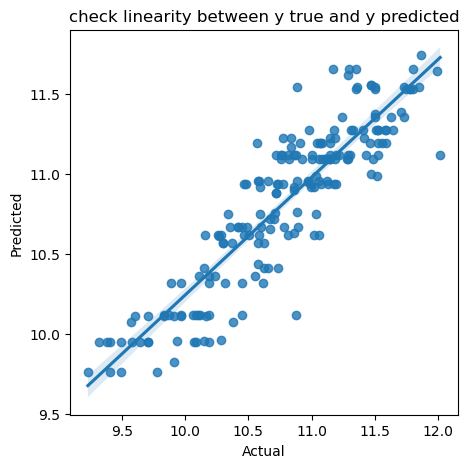

<Figure size 500x500 with 0 Axes>

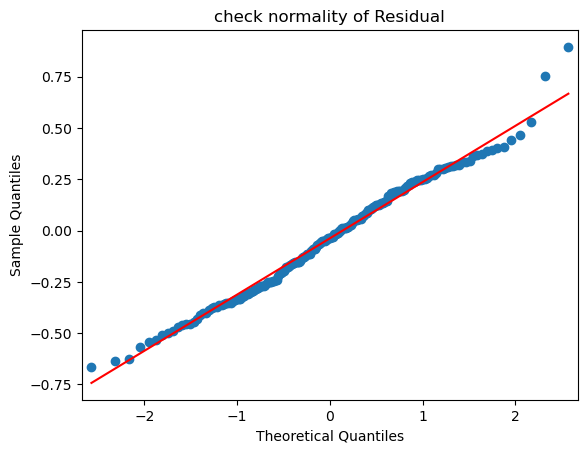

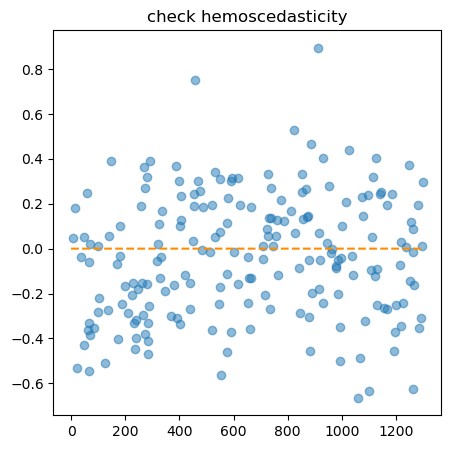

In [110]:
Y=modeling(X_test,y_test,y_train,X_train,AdaBoostRegressor(n_estimators=15,learning_rate=1.0))
result8=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"adaboost"}).T
result=result.append(result8)
result

/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/mohaddesse/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_119976/1977125851.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result8)


,R2_score,RMSE,cv_score,adjusted_r2,mean_residual,normality_error,p
Linear regression,0.786207,0.285984,0.818335,0.772188,-0.01097,No,0.0
Ridge,0.789262,0.283934,0.816905,0.775443,-0.009087,No,0.0
Lasso,0.783808,0.287584,0.767528,0.769631,0.003922,No,0.0
KNN,0.804376,0.273562,0.765425,0.791548,0.019783,No,0.0
Decision tree,0.852871,0.237243,0.799421,0.843223,0.004143,No,0.014636
SVR,0.832373,0.253231,0.822701,0.821381,0.002981,No,0.000099
random forest,0.887096,0.207826,0.869102,0.879692,-0.004462,No,0.037936
adaboost,0.799873,0.276693,0.775503,0.786749,-0.037688,Yes,0.667157
XGboost,0.881269,0.213122,0.870038,0.873483,0.001564,No,0.000988


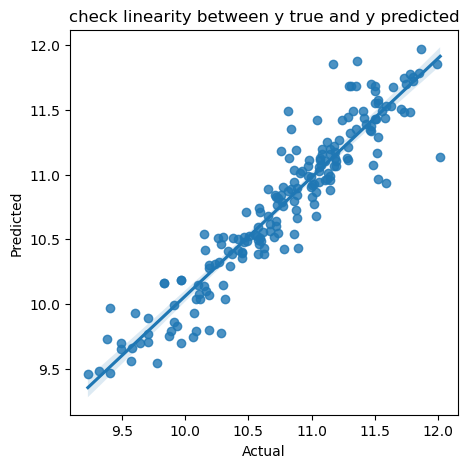

<Figure size 500x500 with 0 Axes>

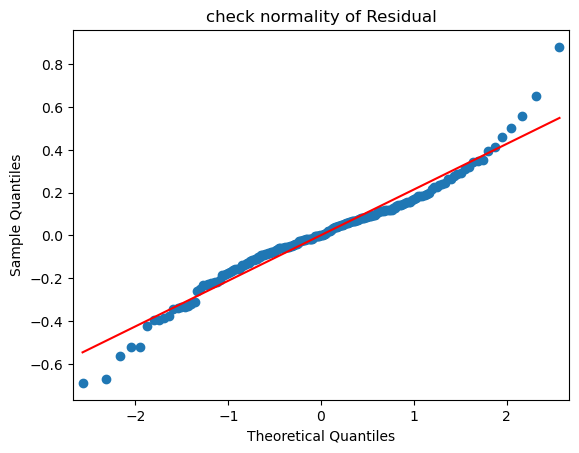

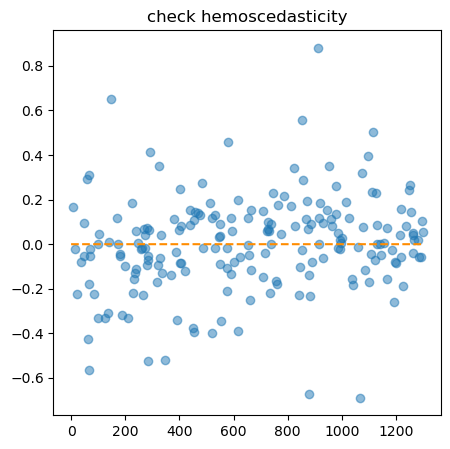

In [111]:
Y=modeling(X_test,y_test,y_train,X_train,XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))
result8=pd.DataFrame(Y,index=["R2_score","RMSE","cv_score","adjusted_r2","mean_residual","normality_error","p"]).rename(columns={0:"XGboost"}).T
result=result.append(result8)
result